In [29]:
# importing libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
# nltk libraries for text pre-processing
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import re
# gensim package
from gensim import corpora
from gensim import models
from collections import Counter
# tsne from sklearn for visualisation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

csv.field_size_limit(100000000)

100000000

In [8]:
df=pd.read_csv('C:\\Users\\verma\\Downloads\\state-of-the-union.csv')

In [9]:
df.head()

1790  \
0  1790   
1  1791   
2  1792   
3  1793   
4  1794   

  George Washington\nJanuary 8, 1790\n\nFellow-Citizens of the Senate and House of Representatives:\n\nI embrace with great satisfaction the opportunity which now presents itself\nof congratulating you on the present favorable prospects of our public\naffairs. The recent accession of the important state of North Carolina to\nthe Constitution of the United States (of which official information has\nbeen received), the rising credit and respectability of our country, the\ngeneral and increasing good will toward the government of the Union, and\nthe concord, peace, and plenty with which we are blessed are circumstances\nauspicious in an eminent degree to our national prosperity.\n\nIn resuming your consultations for the general good you can not but derive\nencouragement from the reflection that the measures of the last session\nhave been as satisfactory to your constituents as the novelty and\ndifficulty of the work allowed you to hope. Still further to realize their\nexpectations and to secure the blessings which a gracious Providence has\nplaced within our reach will in the course of the present important session\ncall for the cool and deliberate exertion of your patriotism, firmness, and\nwisdom.\n\nAmong the many interesting objects which will engage your attention that of\nproviding for the common defense will merit particular regard. To be\nprepared for war is one of the most effectual means of preserving peace.\n\nA free people ought not only to be armed, but disciplined; to which end a\nuniform and well-digested plan is requisite; and their safety and interest\nrequire that they should promote such manufactories as tend to render them\nindependent of others for essential, particularly military, supplies.\n\nThe proper establishment of the troops which may be deemed indispensable\nwill be entitled to mature consideration. In the arrangements which may be\nmade respecting it it will be of importance to conciliate the comfortable\nsupport of the officers and soldiers with a due regard to economy.\n\nThere was reason to hope that the pacific measures adopted with regard to\ncertain hostile tribes of Indians would have relieved the inhabitants of\nour southern and western frontiers from their depredations, but you will\nperceive from the information contained in the papers which I shall direct\nto be laid before you (comprehending a communication from the Commonwealth\nof Virginia) that we ought to be prepared to afford protection to those\nparts of the Union, and, if necessary, to punish aggressors.\n\nThe interests of the United States require that our intercourse with other\nnations should be facilitated by such provisions as will enable me to\nfulfill my duty in that respect in the manner which circumstances may\nrender most conducive to the public good, and to this end that the\ncompensation to be made to the persons who may be employed should,\naccording to the nature of their appointments, be defined by law, and a\ncompetent fund designated for defraying the expenses incident to the\nconduct of foreign affairs.\n\nVarious considerations also render it expedient that the terms on which\nforeigners may be admitted to the rights of citizens should be speedily\nascertained by a uniform rule of naturalization.\n\nUniformity in the currency, weights, and measures of the United States is\nan object of great importance, and will, I am persuaded, be duly attended\nto.\n\nThe advancement of agriculture, commerce, and manufactures by all proper\nmeans will not, I trust, need recommendation; but I can not forbear\nintimating to you the expediency of giving effectual encouragement as well\nto the introduction of new and useful inventions from abroad as to the\nexertions of skill and genius in producing them at home, and of\nfacilitating the intercourse between the distant parts of our country by a\ndue attention to the post-office and post-roads.\n\nNor am I less persua

In [11]:
[a,b]=df.columns
df.columns=['year','speech']
c=df.iloc[0,1]
df.loc[-1] = [a,b]  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()

In [12]:
df.head()

,year,speech
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
1,1790,\nState of the Union Address\nGeorge Washingto...
2,1791,\nState of the Union Address\nGeorge Washingto...
3,1792,\nState of the Union Address\nGeorge Washingto...
4,1793,\nState of the Union Address\nGeorge Washingto...


In [13]:
df['speech2']=df.speech
df['speech3']=df.speech

### Tokenizer

In [15]:
# text-preprocessing
final2=[]
for i in range(len(df)):
    sent=df.iloc[i,1]
    stop_words = set(stopwords.words('english'))
    sent=sent_tokenize(sent)
    final=[]
    for i in range(len(sent)):
        word_tokens = word_tokenize(sent[i].lower()) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words and re.match('[a-zA-Z\-]',w)]
        ''.join([i for i in filtered_sentence if i.isalpha()])
        final.append(filtered_sentence)
    final2.append(final)
df.iloc[:,2]=final2

In [16]:
# text-preprocessing
for i in range(len(df)):
    sent=df.iloc[i,1]
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sent.lower()) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words and re.match('[a-zA-Z\-]',w)]
    ''.join([i for i in filtered_sentence if i.isalpha()])
    df.iloc[i,3]=filtered_sentence

### LSI Model

In [80]:
# loading in gensim package
dictionary = corpora.Dictionary(df.iloc[:,3])
bow_corpus = [dictionary.doc2bow(text) for text in df.iloc[:,3]]

# train the model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [1]:
coherence_values = []
model_list = []
for num_topics in range(2, 180, 2):  # probably run till a big value.
    model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)  # train model
    model_list.append(model)
    coherencemodel = models.CoherenceModel(model=model, texts=df.iloc[:,3], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

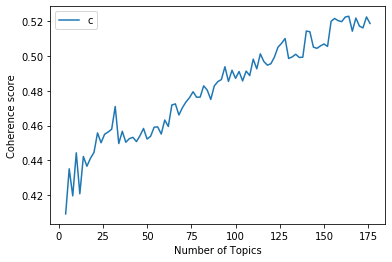

In [60]:
# Show graph
x = range(4, 178, 2)
plt.plot(x, coherence_values[2:])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [61]:
coherence_values

[0.4394586046743394,
 0.39123879107238385,
 0.4093188500637336,
 0.4351849907283925,
 0.4196823909690244,
 0.4443644575065319,
 0.4208636697699256,
 0.4422710304204206,
 0.4366783434403936,
 0.4412239809345432,
 0.4445966467268261,
 0.4557966414606766,
 0.4501436430493822,
 0.45502137902503736,
 0.45632352065616044,
 0.4578986600944965,
 0.47096512038029426,
 0.44968723497961965,
 0.4567157692233174,
 0.4504382611312507,
 0.4525294131981811,
 0.4532548541774408,
 0.4508195806382954,
 0.454216878364152,
 0.45834347441112155,
 0.4522820170608362,
 0.4538725678376536,
 0.45906706207019654,
 0.45924531623252995,
 0.45515613942123395,
 0.46318624322495994,
 0.4594814551712638,
 0.4718032136516398,
 0.47244075790191237,
 0.4660831767623434,
 0.4703059369006745,
 0.4735740323330189,
 0.47604484400570735,
 0.47941495533930356,
 0.4762583913351249,
 0.4763491557740926,
 0.4828091523248029,
 0.48036329194277055,
 0.4749951409441712,
 0.4827699219074275,
 0.4852528132365962,
 0.4864115792187738,


In [17]:
# most suited model with highest coherence.
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=40)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]

In [77]:
topics = lsi_model.show_topics(formatted=False)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight])

df3 = pd.DataFrame(out, columns=['word', 'topic_id', 'importance']) 

In [79]:
df3.importance=abs(df3.importance)
df3

,word,topic_id,importance
0,-,0,0.076554
1,upon,0,0.073859
2,tonight,0,0.061643
3,mexico,0,0.058183
4,program,0,0.057671
...,...,...,...
295,n't,29,0.074862
296,lake,29,0.071659
297,savages,29,0.065583
298,budget,29,0.063253


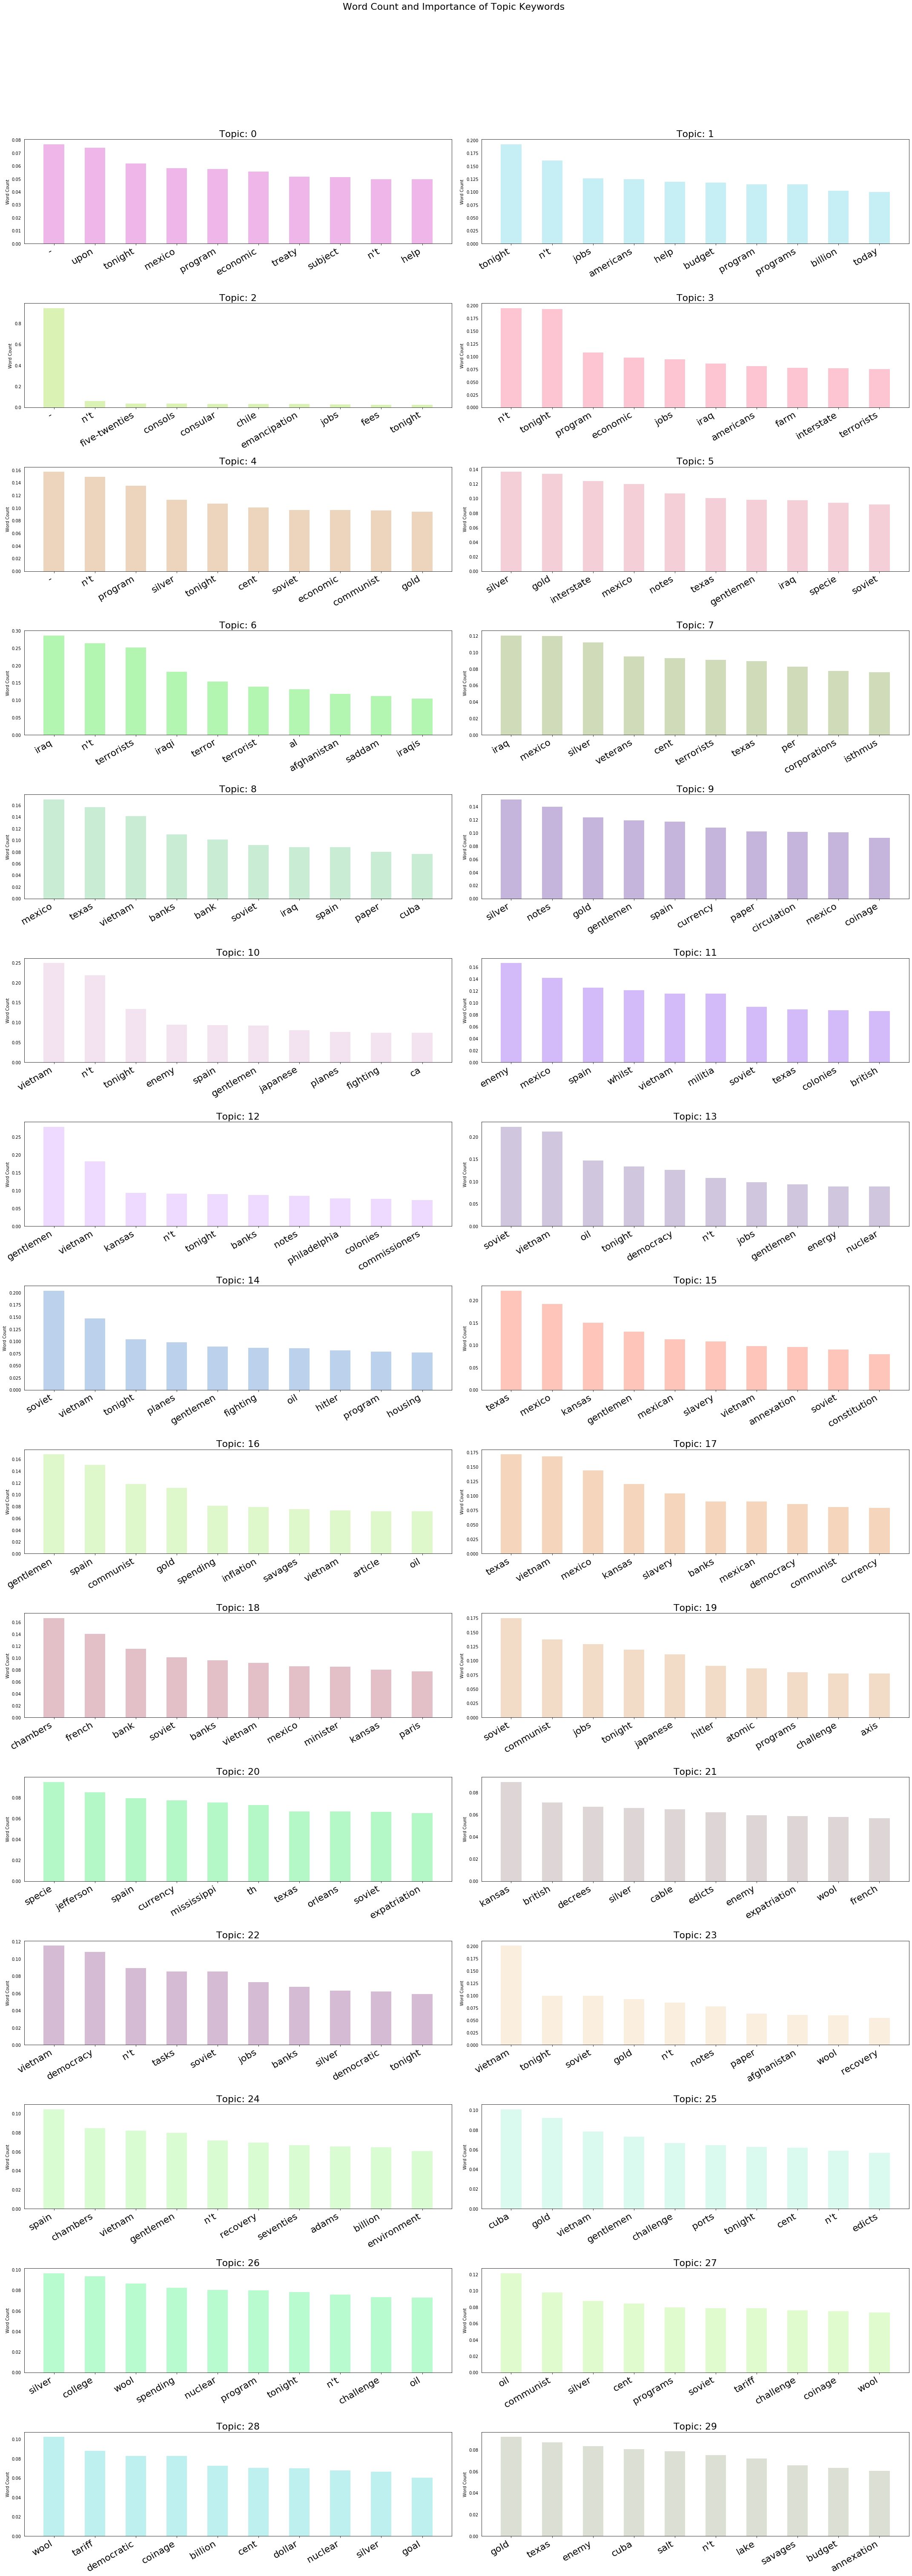

In [80]:
# showing the topics as per their co-efficients
fig, axes = plt.subplots(15, 2, figsize=(30,80))
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="importance", data=df3.loc[df3.topic_id==i, :],color=np.random.random(3),  width=0.5, alpha=0.3, label='Word Count')
    #ax_twin = ax.twinx()
    #ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=22)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df3.loc[df3.topic_id==i, 'word'],fontsize=22, rotation=30, horizontalalignment= 'right')
    #ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [38]:
pprint.pprint(lsi_model.print_topics(num_words=20))

[(0,
  '0.077*"-" + 0.074*"upon" + 0.062*"tonight" + 0.058*"mexico" + '
  '0.058*"program" + 0.056*"economic" + 0.052*"treaty" + 0.051*"subject" + '
  '0.050*"n\'t" + 0.050*"help" + 0.049*"budget" + 0.049*"cent" + '
  '0.049*"treasury" + 0.048*"americans" + 0.048*"spain" + 0.047*"silver" + '
  '0.047*"department" + 0.047*"duties" + 0.047*"programs" + 0.046*"territory"'),
 (1,
  '0.192*"tonight" + 0.161*"n\'t" + 0.126*"jobs" + 0.124*"americans" + '
  '0.119*"help" + 0.118*"budget" + 0.114*"program" + 0.114*"programs" + '
  '0.102*"billion" + 0.099*"today" + 0.099*"economic" + 0.093*"percent" + '
  '0.084*"america" + 0.082*"soviet" + 0.081*"spending" + 0.075*"nuclear" + '
  '0.072*"let" + 0.069*"--" + 0.067*"million" + 0.066*"children"'),
 (2,
  '-0.944*"-" + -0.059*"n\'t" + -0.035*"five-twenties" + -0.035*"consols" + '
  '-0.033*"consular" + -0.030*"chile" + -0.030*"emancipation" + -0.026*"jobs" '
  '+ -0.024*"fees" + -0.023*"tonight" + -0.022*"diplomatic" + '
  '-0.021*"miscellaneous" 

In [37]:
pprint.pprint(lsi_model.show_topics(num_words=20))

[(0,
  '0.077*"-" + 0.074*"upon" + 0.062*"tonight" + 0.058*"mexico" + '
  '0.058*"program" + 0.056*"economic" + 0.052*"treaty" + 0.051*"subject" + '
  '0.050*"n\'t" + 0.050*"help" + 0.049*"budget" + 0.049*"cent" + '
  '0.049*"treasury" + 0.048*"americans" + 0.048*"spain" + 0.047*"silver" + '
  '0.047*"department" + 0.047*"duties" + 0.047*"programs" + 0.046*"territory"'),
 (1,
  '0.192*"tonight" + 0.161*"n\'t" + 0.126*"jobs" + 0.124*"americans" + '
  '0.119*"help" + 0.118*"budget" + 0.114*"program" + 0.114*"programs" + '
  '0.102*"billion" + 0.099*"today" + 0.099*"economic" + 0.093*"percent" + '
  '0.084*"america" + 0.082*"soviet" + 0.081*"spending" + 0.075*"nuclear" + '
  '0.072*"let" + 0.069*"--" + 0.067*"million" + 0.066*"children"'),
 (2,
  '-0.944*"-" + -0.059*"n\'t" + -0.035*"five-twenties" + -0.035*"consols" + '
  '-0.033*"consular" + -0.030*"chile" + -0.030*"emancipation" + -0.026*"jobs" '
  '+ -0.024*"fees" + -0.023*"tonight" + -0.022*"diplomatic" + '
  '-0.021*"miscellaneous" 

### LDA MODEL 

In [4]:
coherence_values = []
model_list = []
for num_topics in range(2, 120, 2):
    model = models.ldamodel.LdaModel(corpus_tfidf, num_topics = num_topics, id2word=dictionary, passes=15)
    model_list.append(model)
    coherencemodel = models.CoherenceModel(model=model, texts=df.iloc[:,3], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

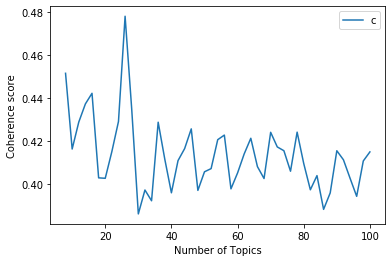

In [52]:
# Show graph
x = range(2, 120, 2)
plt.plot(x[3:], coherence_values[3:])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [81]:
# most suited model with highest coherence.
lda_model = models.ldamodel.LdaModel(bow_corpus, id2word=dictionary, num_topics=26,passes=15)  # initialize an LSI transformation
corpus_lda = lda_model[bow_corpus]

In [82]:
topics = lda_model.show_topics(num_topics=26,formatted=False)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight])

df3 = pd.DataFrame(out, columns=['word', 'topic_id', 'importance']) 

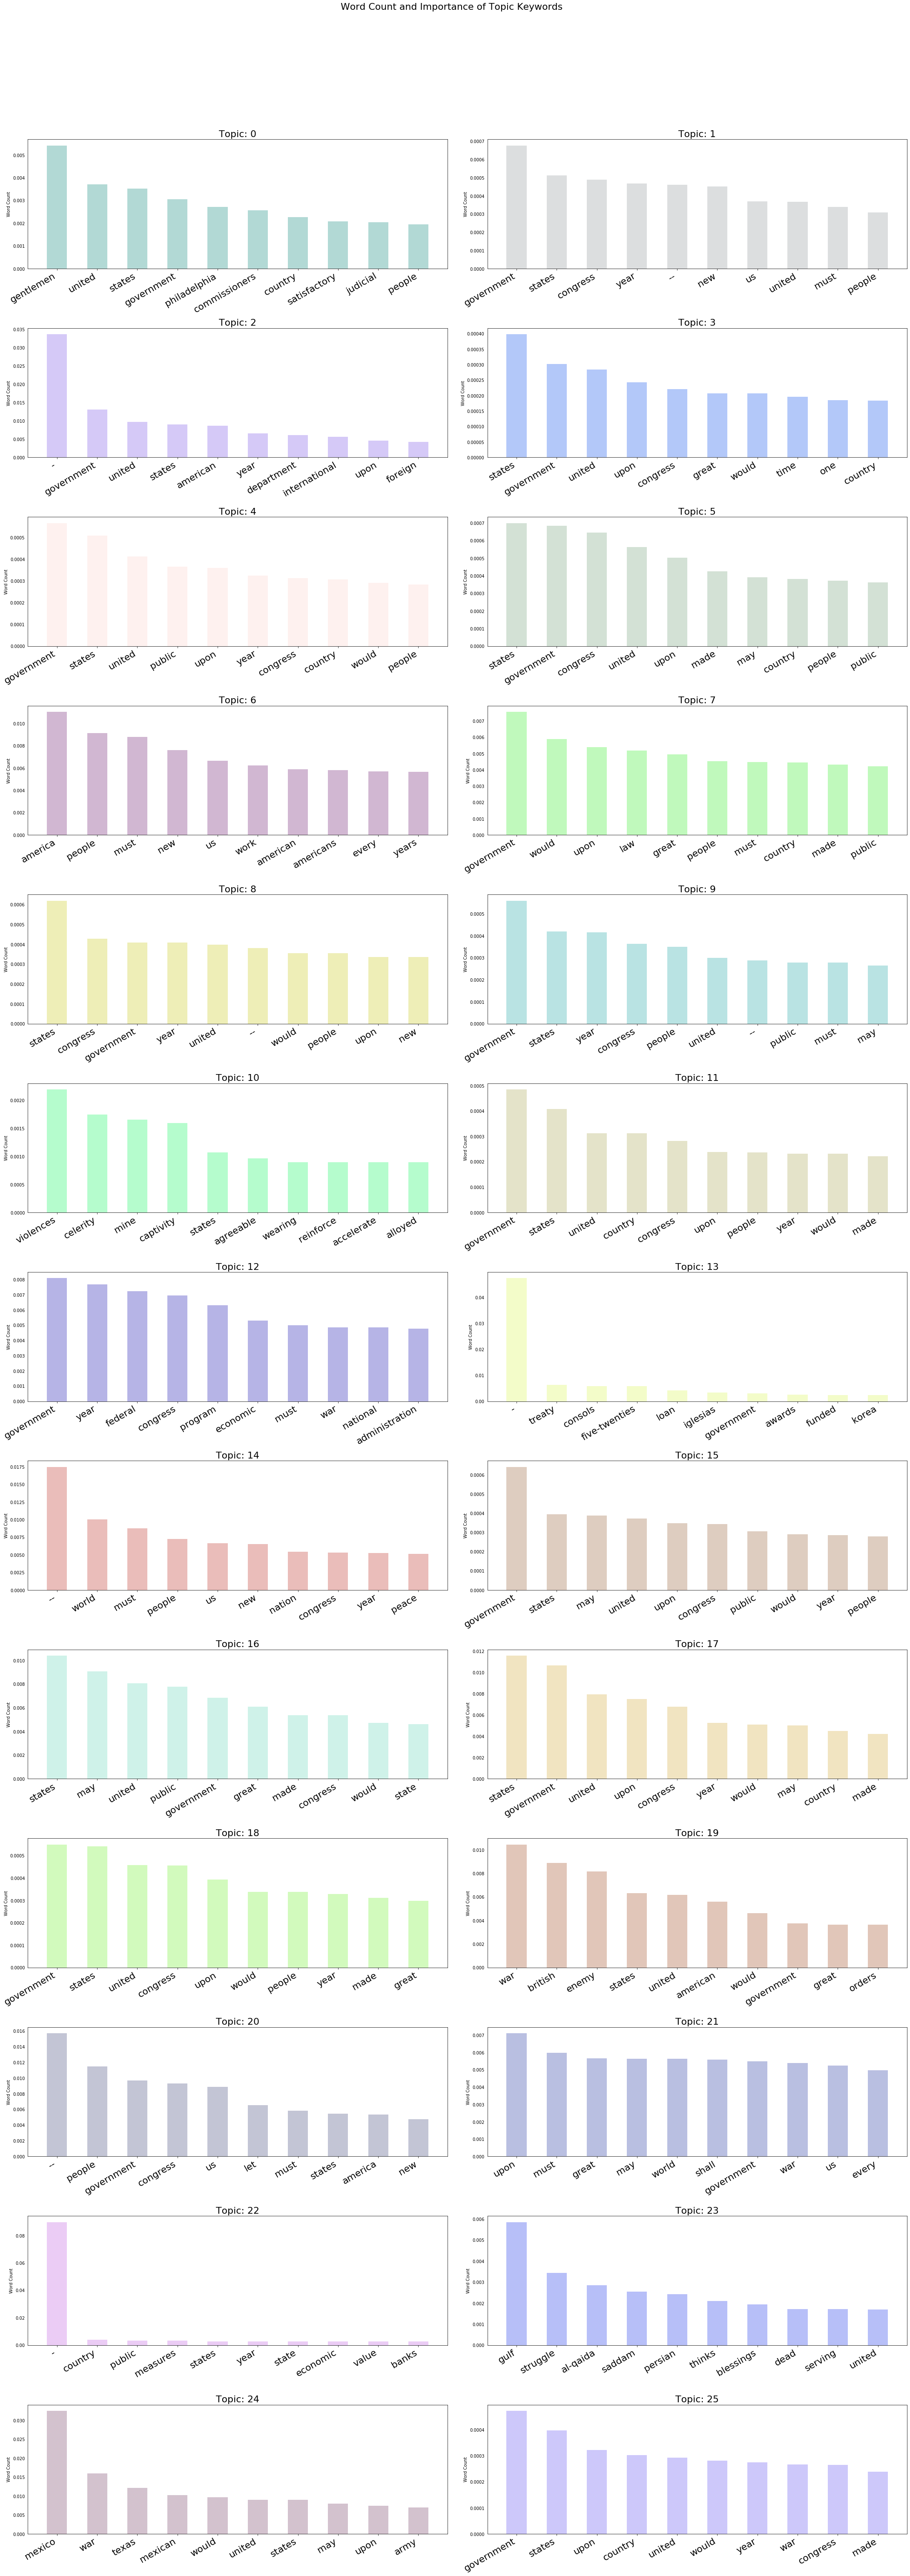

In [83]:
# showing the topics as per their co-efficients
fig, axes = plt.subplots(13, 2, figsize=(30,80))
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="importance", data=df3.loc[df3.topic_id==i, :],color=np.random.random(3),  width=0.5, alpha=0.3, label='Word Count')
    #ax_twin = ax.twinx()
    #ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=22)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df3.loc[df3.topic_id==i, 'word'],fontsize=22, rotation=30, horizontalalignment= 'right')
    #ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [21]:
pprint.pprint(lda_model.print_topics(num_topics=26,num_words=25))

[(0,
  '0.000*"government" + 0.000*"states" + 0.000*"congress" + 0.000*"united" + '
  '0.000*"year" + 0.000*"people" + 0.000*"must" + 0.000*"may" + 0.000*"would" '
  '+ 0.000*"country" + 0.000*"upon" + 0.000*"great" + 0.000*"--" + '
  '0.000*"made" + 0.000*"public" + 0.000*"one" + 0.000*"new" + '
  '0.000*"american" + 0.000*"time" + 0.000*"every" + 0.000*"war" + '
  '0.000*"state" + 0.000*"present" + 0.000*"last" + 0.000*"national"'),
 (1,
  '0.001*"government" + 0.000*"states" + 0.000*"congress" + 0.000*"year" + '
  '0.000*"upon" + 0.000*"united" + 0.000*"would" + 0.000*"country" + '
  '0.000*"new" + 0.000*"state" + 0.000*"people" + 0.000*"--" + 0.000*"great" + '
  '0.000*"made" + 0.000*"last" + 0.000*"national" + 0.000*"time" + '
  '0.000*"must" + 0.000*"us" + 0.000*"public" + 0.000*"one" + 0.000*"years" + '
  '0.000*"shall" + 0.000*"world" + 0.000*"power"'),
 (2,
  '0.001*"government" + 0.000*"congress" + 0.000*"states" + 0.000*"--" + '
  '0.000*"people" + 0.000*"united" + 0.000*"ma

### TASK 4 

In [22]:
# finding the dominant topics per document.
def format_topics_sentences(corpus,texts,ldamodel=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [23]:
# using LDA
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=df.iloc[:,3])

In [24]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9981,"public, may, government, states, country, unit...","[george, washington, january, fellow-citizens,..."
1,1,4.0,0.9985,"public, may, government, states, country, unit...","[state, union, address, george, washington, de..."
2,2,20.0,0.5121,"united, states, government, spain, may, war, c...","[state, union, address, george, washington, oc..."
3,3,4.0,0.6747,"public, may, government, states, country, unit...","[state, union, address, george, washington, no..."
4,4,4.0,0.4344,"public, may, government, states, country, unit...","[state, union, address, george, washington, de..."
5,5,9.0,0.4336,"government, would, upon, states, law, great, c...","[state, union, address, george, washington, no..."
6,6,4.0,0.5818,"public, may, government, states, country, unit...","[state, union, address, george, washington, de..."
7,7,4.0,0.5066,"public, may, government, states, country, unit...","[state, union, address, george, washington, de..."
8,8,20.0,0.9984,"united, states, government, spain, may, war, c...","[state, union, address, john, adams, november,..."
9,9,20.0,0.5939,"united, states, government, spain, may, war, c...","[state, union, address, john, adams, december,..."


In [26]:
df_dominant_topic.to_csv('file1.csv')

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

doc_lens = [len(d) for d in df_dominant_topic.Text]

Text(0.5, 1.0, 'Distribution of Document Word Counts')

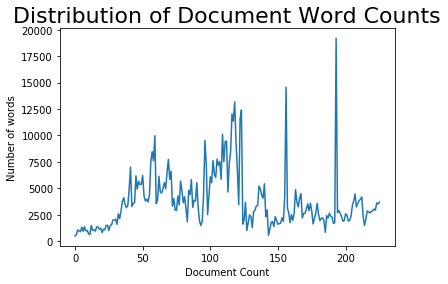

In [41]:
plt.plot(doc_lens)
plt.gca().set(ylabel='Number of words', xlabel='Document Count')
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))

In [25]:
set(df_dominant_topic.Dominant_Topic)

{4.0, 9.0, 12.0, 14.0, 15.0, 20.0, 22.0, 24.0, 25.0}

In [64]:
# using LSA
final1=[]
final2=[]
doc1=[]
doc2=[]
for i, row_list in enumerate(lsi_model[corpus_tfidf]):
    maxs=0
    docs=0
    row_list.sort(key=lambda x:x[1])
    # first
    a=row_list[0][1]
    aa=row_list[0][0]
    # second
    b=row_list[1][1]
    bb=row_list[1][0]
    # last
    c=row_list[3][1]
    cc=row_list[3][0]
    # second-last
    d=row_list[2][1]
    dd=row_list[2][0]
    if(abs(a)>abs(c)):
        doc1.append(a)
        final1.append(aa)
        if(abs(b)>abs(c)):
            doc2.append(b)
            final2.append(bb)
        else:
            doc2.append(c)
            final2.append(cc)
    elif(abs(c)>abs(a)):
        doc1.append(c)
        final1.append(cc)
        if(abs(d)>abs(a)):
            doc2.append(d)
            final2.append(dd)
        else:
            doc2.append(a)
            final2.append(aa)

In [83]:
# model topic vectors
lsi_model.get_topics()

array([[ 0.04618269,  0.0166684 ,  0.0073088 , ...,  0.00028589,
         0.00028589,  0.00028589],
       [ 0.06904887,  0.00521575, -0.00602233, ...,  0.00087687,
         0.00087687,  0.00087687],
       [ 0.00405687, -0.00037978,  0.00185781, ..., -0.00182459,
        -0.00182459, -0.00182459],
       ...,
       [-0.01419233,  0.00233644,  0.00232441, ..., -0.00048994,
        -0.00048994, -0.00048994],
       [ 0.01220348, -0.00462382, -0.00512333, ..., -0.00036121,
        -0.00036121, -0.00036121],
       [ 0.00038876, -0.00162833,  0.00447818, ..., -0.00151906,
        -0.00151906, -0.00151906]])

In [99]:
pprint.pprint(lsi_model.print_topics(num_topics=20, num_words=20))

[(0,
  '0.077*"-" + 0.074*"upon" + 0.062*"tonight" + 0.058*"mexico" + '
  '0.058*"program" + 0.056*"economic" + 0.052*"treaty" + 0.051*"subject" + '
  '0.050*"n\'t" + 0.050*"help" + 0.049*"budget" + 0.049*"cent" + '
  '0.049*"treasury" + 0.048*"americans" + 0.048*"spain" + 0.047*"silver" + '
  '0.047*"department" + 0.047*"duties" + 0.047*"programs" + 0.046*"territory"'),
 (1,
  '0.192*"tonight" + 0.161*"n\'t" + 0.126*"jobs" + 0.124*"americans" + '
  '0.119*"help" + 0.118*"budget" + 0.114*"program" + 0.114*"programs" + '
  '0.102*"billion" + 0.099*"today" + 0.099*"economic" + 0.093*"percent" + '
  '0.084*"america" + 0.082*"soviet" + 0.081*"spending" + 0.075*"nuclear" + '
  '0.072*"let" + 0.069*"--" + 0.067*"million" + 0.066*"children"'),
 (2,
  '-0.944*"-" + -0.059*"n\'t" + -0.035*"five-twenties" + -0.035*"consols" + '
  '-0.033*"consular" + -0.030*"chile" + -0.030*"emancipation" + -0.026*"jobs" '
  '+ -0.024*"fees" + -0.023*"tonight" + -0.022*"diplomatic" + '
  '-0.021*"miscellaneous" 

In [100]:
pprint.pprint(lda_model.print_topics(num_topics=20, num_words=20))

[(13,
  '0.001*"states" + 0.001*"government" + 0.000*"united" + 0.000*"congress" + '
  '0.000*"upon" + 0.000*"may" + 0.000*"one" + 0.000*"year" + 0.000*"country" + '
  '0.000*"public" + 0.000*"people" + 0.000*"would" + 0.000*"war" + 0.000*"--" '
  '+ 0.000*"made" + 0.000*"last" + 0.000*"power" + 0.000*"years" + '
  '0.000*"world" + 0.000*"must"'),
 (7,
  '0.001*"government" + 0.001*"states" + 0.001*"upon" + 0.000*"congress" + '
  '0.000*"united" + 0.000*"public" + 0.000*"great" + 0.000*"made" + '
  '0.000*"would" + 0.000*"country" + 0.000*"may" + 0.000*"year" + '
  '0.000*"people" + 0.000*"american" + 0.000*"must" + 0.000*"power" + '
  '0.000*"last" + 0.000*"shall" + 0.000*"war" + 0.000*"state"'),
 (15,
  '0.001*"states" + 0.001*"government" + 0.001*"united" + 0.001*"congress" + '
  '0.001*"country" + 0.000*"public" + 0.000*"people" + 0.000*"upon" + '
  '0.000*"great" + 0.000*"may" + 0.000*"--" + 0.000*"year" + 0.000*"made" + '
  '0.000*"time" + 0.000*"would" + 0.000*"power" + 0.000*"p

In [88]:
df2=pd.DataFrame(final1)
df2['ehe']=final2
df2.columns=[['most important','second important']]

In [92]:
df2.head()

,most important,second important
0,38,55
1,61,60
2,103,67
3,81,63
4,56,74


In [62]:
data=pd.read_csv('C:\\Users\\verma\\Downloads\\ap.csv')

In [63]:
data.head()

,AP881218-0003,"A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Friends and family said the boy apparently was troubled by his grandmother's death and the divorce of his parents and had been tormented by classmates. Nicholas' grandfather, Clarence Elliott Sr., said Saturday that the boy's parents separated about four years ago and his maternal grandmother, Channey Williams, died last year after a long illness. The grandfather also said his grandson was fascinated with guns. ``The boy was always talking about guns,'' he said. ``He knew a lot about them. He knew all the names of them _ none of those little guns like a .32 or a .22 or nothing like that. He liked the big ones.'' The slain teacher was identified as Karen H. Farley, 40. The wounded teacher, 37-year-old Sam Marino, was in serious condition Saturday with gunshot wounds in the shoulder. Police said the boy also shot at a third teacher, Susan Allen, 31, as she fled from the room where Marino was shot. He then shot Marino again before running to a third classroom where a Bible class was meeting. The youngster shot the glass out of a locked door before opening fire, police spokesman Lewis Thurston said. When the youth's pistol jammed, he was tackled by teacher Maurice Matteson, 24, and other students, Thurston said. ``Once you see what went on in there, it's a miracle that we didn't have more people killed,'' Police Chief Charles R. Wall said. Police didn't have a motive, Detective Tom Zucaro said, but believe the boy's primary target was not a teacher but a classmate. Officers found what appeared to be three Molotov cocktails in the boy's locker and confiscated the gun and several spent shell casings. Fourteen rounds were fired before the gun jammed, Thurston said. The gun, which the boy carried to school in his knapsack, was purchased by an adult at the youngster's request, Thurston said, adding that authorities have interviewed the adult, whose name is being withheld pending an investigation by the federal Bureau of Alcohol, Tobacco and Firearms. The shootings occurred in a complex of four portable classrooms for junior and senior high school students outside the main building of the 4-year-old school. The school has 500 students in kindergarten through 12th grade. Police said they were trying to reconstruct the sequence of events and had not resolved who was shot first. The body of Ms. Farley was found about an hour after the shootings behind a classroom door."
0,AP880224-0195,The Bechtel Group Inc. offered in 1985 to sell...
1,AP881017-0144,A gunman took a 74-year-old woman hostage afte...
2,AP881017-0219,"Today is Saturday, Oct. 29, the 303rd day of 1..."
3,AP900117-0022,Cupid has a new message for lovers this Valent...
4,AP880405-0167,The Reagan administration is weighing whether ...


In [64]:
[a,b]=data.columns
data.columns=['id','speech']
c=data.iloc[0,1]
data.loc[-1] = [a,b]  # adding a row
data.index = data.index + 1  # shifting index
data = data.sort_index()

In [65]:
data.head()

,id,speech
0,AP881218-0003,A 16-year-old student at a private Baptist sch...
1,AP880224-0195,The Bechtel Group Inc. offered in 1985 to sell...
2,AP881017-0144,A gunman took a 74-year-old woman hostage afte...
3,AP881017-0219,"Today is Saturday, Oct. 29, the 303rd day of 1..."
4,AP900117-0022,Cupid has a new message for lovers this Valent...


In [66]:
data['speech2']=data.speech
data['speech3']=data.speech

In [67]:
stop_words = set(stopwords.words('english'))
for i in range(len(data)):
    sent=str(data.iloc[i,1])
    sent=sent.lower()
    word_tokens = word_tokenize(sent) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words and re.match('[a-zA-Z\-]',w)]
    ''.join([i for i in filtered_sentence if i.isalpha()])
    data.iloc[i,3]=filtered_sentence

In [68]:
data.head()

,id,speech,speech2,speech3
0,AP881218-0003,A 16-year-old student at a private Baptist sch...,A 16-year-old student at a private Baptist sch...,"[student, private, baptist, school, allegedly,..."
1,AP880224-0195,The Bechtel Group Inc. offered in 1985 to sell...,The Bechtel Group Inc. offered in 1985 to sell...,"[bechtel, group, inc., offered, sell, oil, isr..."
2,AP881017-0144,A gunman took a 74-year-old woman hostage afte...,A gunman took a 74-year-old woman hostage afte...,"[gunman, took, woman, hostage, foiled, attempt..."
3,AP881017-0219,"Today is Saturday, Oct. 29, the 303rd day of 1...","Today is Saturday, Oct. 29, the 303rd day of 1...","[today, saturday, oct., day, days, left, year,..."
4,AP900117-0022,Cupid has a new message for lovers this Valent...,Cupid has a new message for lovers this Valent...,"[cupid, new, message, lovers, valentine, day, ..."


In [69]:
dictionary = corpora.Dictionary(data.iloc[:,3])
bow_corpus = [dictionary.doc2bow(text) for text in data.iloc[:,3]]

# train the model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [6]:
coherence_values = []
model_list = []
for num_topics in range(2, 180, 2):
    model = models.ldamodel.LdaModel(corpus_tfidf, num_topics = num_topics, id2word=dictionary, passes=15)
    model_list.append(model)
    coherencemodel = models.CoherenceModel(model=model, texts=data.iloc[:,3], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

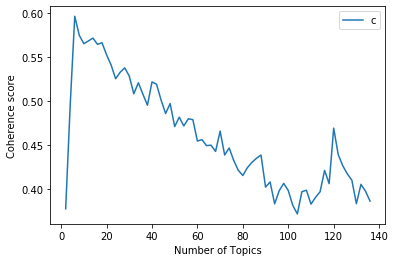

In [137]:
# Show graph
x = range(2, 138, 2)
plt.plot(x, coherence_values[2:])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [98]:
lda_model2 = models.ldamodel.LdaModel(bow_corpus, id2word=dictionary, num_topics=20,passes=15)  # initialize an LSI transformation
corpus_lda = lda_model2[bow_corpus]
pprint.pprint(lda_model2.print_topics(num_words=25))

[(0,
  '0.023*"said" + 0.010*"water" + 0.009*"people" + 0.008*"ohio" + '
  '0.008*"county" + 0.006*"river" + 0.005*"area" + 0.005*"one" + 0.005*"two" + '
  '0.005*"national" + 0.005*"service" + 0.005*"weather" + 0.004*"homes" + '
  '0.004*"rain" + 0.004*"heat" + 0.004*"northern" + 0.004*"miles" + '
  '0.004*"tax" + 0.004*"central" + 0.004*"high" + 0.004*"reported" + '
  '0.004*"calif." + 0.004*"creek" + 0.003*"degrees" + 0.003*"san"'),
 (1,
  '0.021*"dollar" + 0.017*"said" + 0.016*"late" + 0.013*"cents" + 0.013*"yen" '
  '+ 0.012*"london" + 0.011*"gold" + 0.010*"lower" + 0.010*"bid" + '
  '0.009*"market" + 0.009*"tuesday" + 0.009*"cent" + 0.008*"higher" + '
  '0.008*"prices" + 0.008*"futures" + 0.008*"price" + 0.007*"ounce" + '
  '0.007*"trading" + 0.007*"u.s." + 0.007*"dealers" + 0.007*"compared" + '
  '0.006*"tokyo" + 0.006*"bank" + 0.006*"pound" + 0.006*"oil"'),
 (2,
  '0.005*"shatt" + 0.003*"tempo" + 0.003*"nbc" + 0.002*"vandenberg" + '
  '0.002*"cable" + 0.002*"ashe" + 0.002*"armo

In [140]:
pprint.pprint(lda_model2.show_topics(num_words=25))

[(0,
  '0.027*"said" + 0.010*"police" + 0.006*"would" + 0.006*"u.s." + '
  '0.006*"court" + 0.005*"government" + 0.004*"two" + 0.004*"one" + '
  '0.004*"attorney" + 0.004*"case" + 0.004*"east" + 0.004*"military" + '
  '0.004*"germany" + 0.004*"also" + 0.004*"officials" + 0.003*"united" + '
  '0.003*"judge" + 0.003*"german" + 0.003*"former" + 0.003*"north" + '
  '0.003*"charges" + 0.003*"west" + 0.003*"told" + 0.003*"trial" + '
  '0.003*"thursday"'),
 (1,
  '0.014*"said" + 0.006*"owen" + 0.005*"dresses" + 0.005*"government" + '
  '0.004*"way" + 0.004*"police" + 0.004*"people" + 0.004*"dress" + '
  '0.003*"united" + 0.003*"maung" + 0.003*"greyhound" + 0.003*"says" + '
  '0.003*"spain" + 0.003*"gunter" + 0.003*"cocaine" + 0.003*"would" + '
  '0.003*"organizations" + 0.003*"demonstrators" + 0.003*"students" + '
  '0.003*"bridal" + 0.003*"bank" + 0.002*"u.s." + 0.002*"barahona" + '
  '0.002*"two" + 0.002*"burma"'),
 (2,
  '0.026*"said" + 0.005*"people" + 0.005*"new" + 0.005*"n\'t" + 0.005*"

In [77]:
lda_model2 = models.ldamodel.LdaModel(bow_corpus, id2word=dictionary, num_topics=20)  # initialize an LSI transformation
corpus_lda = lda_model2[bow_corpus]

In [78]:
topics = lda_model2.show_topics(num_topics=20,formatted=False)


out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight])

df3 = pd.DataFrame(out, columns=['word', 'topic_id', 'importance']) 

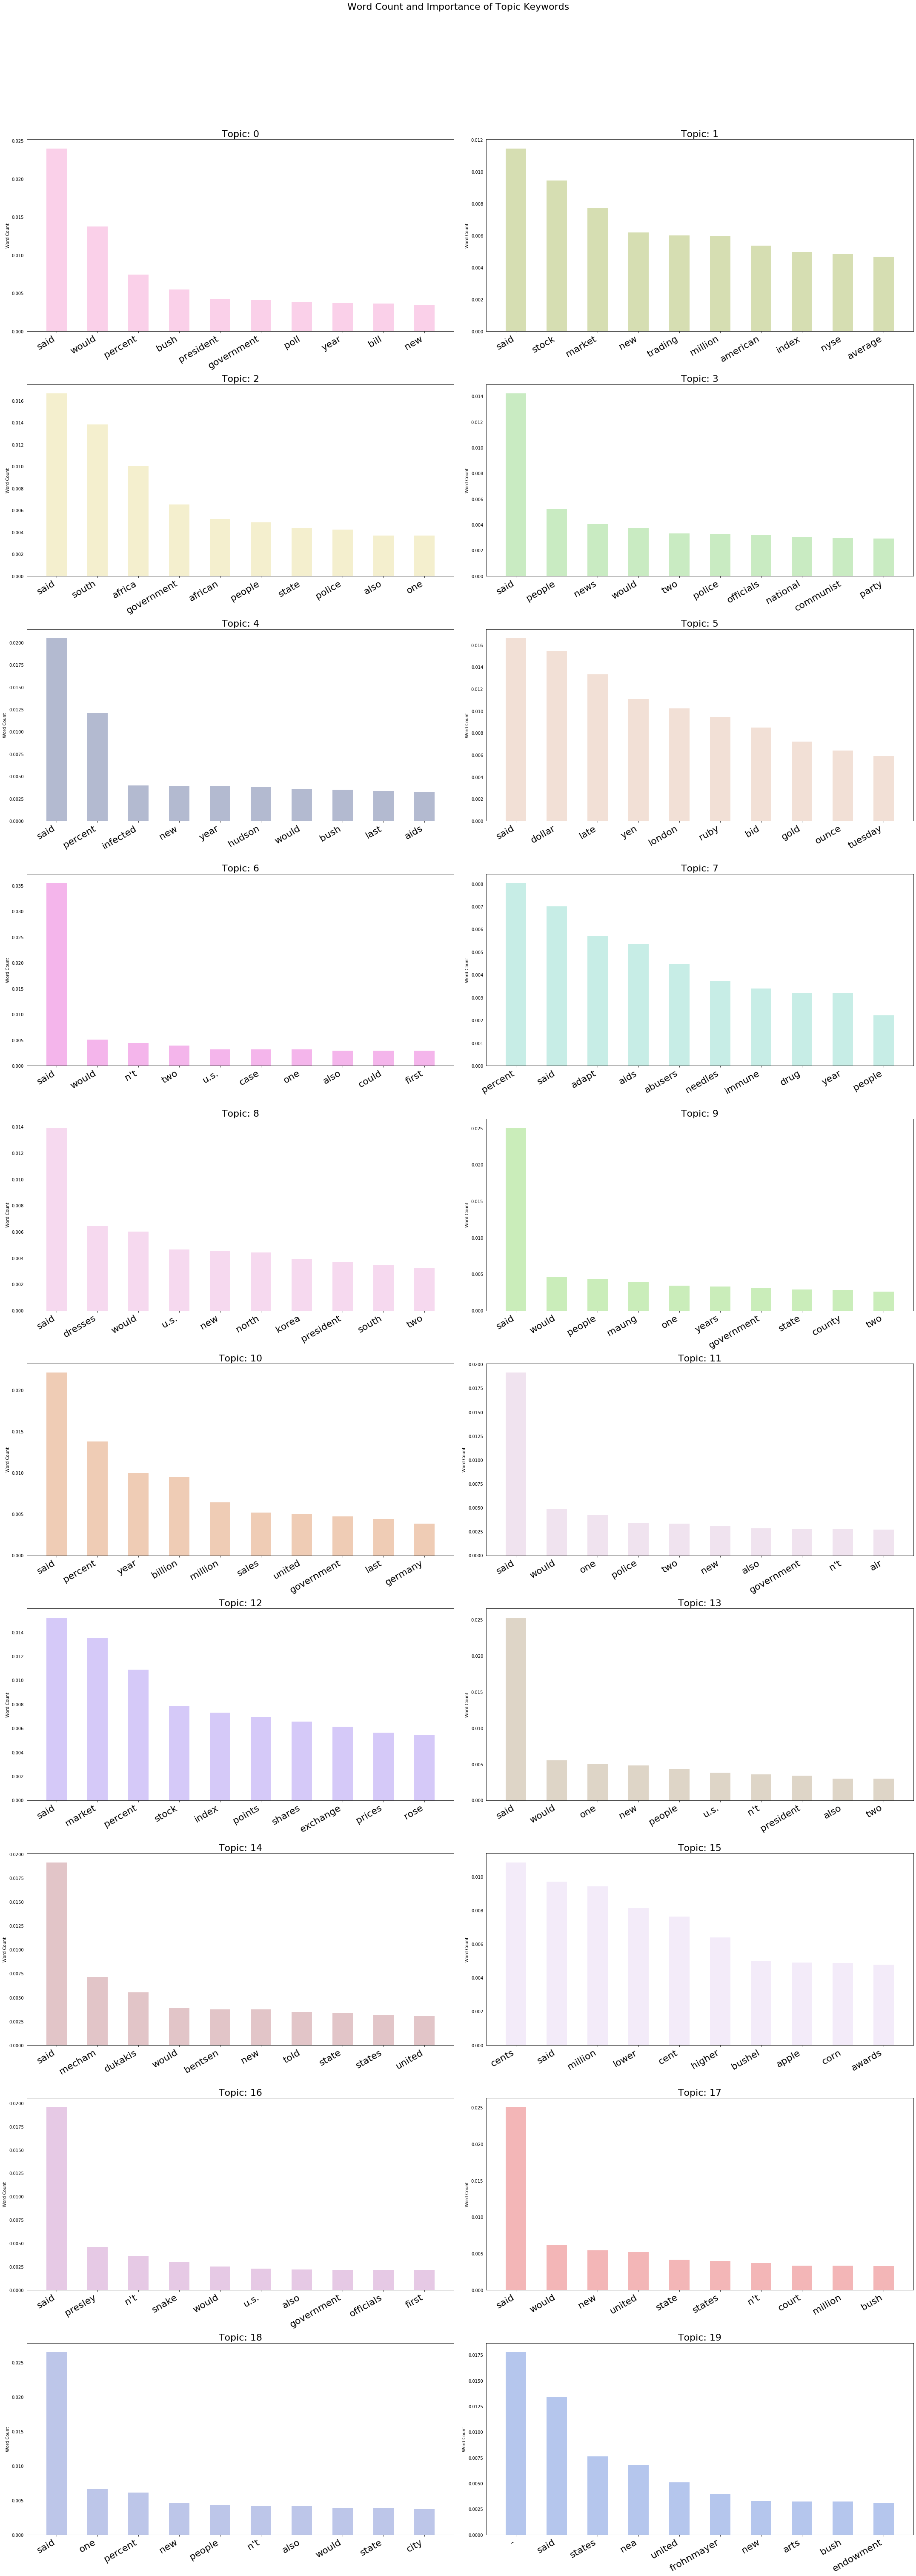

In [79]:
fig, axes = plt.subplots(10, 2, figsize=(30,80))
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="importance", data=df3.loc[df3.topic_id==i, :],color=np.random.random(3),  width=0.5, alpha=0.3, label='Word Count')
    #ax_twin = ax.twinx()
    #ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=22)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df3.loc[df3.topic_id==i, 'word'],fontsize=22, rotation=30, horizontalalignment= 'right')
    #ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [121]:
x=lsi_model.get_topics()

In [110]:
y=lda_model.get_topics()

In [122]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(x)

[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.001s...
[t-SNE] Computed neighbors for 30 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.386650
[t-SNE] KL divergence after 1000 iterations: 0.451558


In [123]:
n_topics = 30
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LSI Topics".format(n_topics), 
              plot_width=600, plot_height=400)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[1])
show(plot)

In [114]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(y)

[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.001s...
[t-SNE] Computed neighbors for 26 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.551949
[t-SNE] KL divergence after 750 iterations: 0.443078


In [115]:
n_topics = 26
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=600, plot_height=400)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[1])
show(plot)

In [116]:
y2=lda_model2.get_topics()

In [117]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(y2)

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.002s...
[t-SNE] Computed neighbors for 20 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.230404
[t-SNE] KL divergence after 1000 iterations: 0.388813


In [120]:
n_topics = 20
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=600, plot_height=400)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[1])
show(plot)

In [104]:
print('\nPerplexity:', lda_model2.log_perplexity(bow_corpus))


Perplexity: -9.522917658719486


In [106]:
print('\nPerplexity:', lda_model.log_perplexity(bow_corpus))


Perplexity: -8.404044364429746
